In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Udacity/Convolutional_Neural_Networks/Project

/content/drive/MyDrive/Udacity/Convolutional_Neural_Networks/Project


# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [3]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

In [4]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [10]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.0, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/Udacity/Convolutional_Neural_Networks/Project
plugins: anyio-3.7.1
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 5.85s ===============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [5]:
batch_size = 20  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 20  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.01 # Learning rate for SGD (or Adam)
opt = 'sgd'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

In [6]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning
import torch

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning(model_name="vgg16", n_classes=num_classes)
# model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))


# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=False
)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Validating: 100%|███████████████████████████████| 50/50 [00:11<00:00,  4.29it/s]


Epoch: 1 	Training Loss: 3.018103 	Validation Loss: 1.755962
valid_loss_min: None
New minimum validation loss: 1.755962. Saving model ...
lr: 0.01


Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.02it/s]


Epoch: 2 	Training Loss: 2.420791 	Validation Loss: 1.492652
valid_loss_min: 1.7559619116783143
New minimum validation loss: 1.492652. Saving model ...
lr: 0.01


Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  3.96it/s]


Epoch: 3 	Training Loss: 2.309111 	Validation Loss: 1.414561
valid_loss_min: 1.4926516115665438
New minimum validation loss: 1.414561. Saving model ...
lr: 0.01


Validating: 100%|███████████████████████████████| 50/50 [00:11<00:00,  4.17it/s]


Epoch: 4 	Training Loss: 2.229081 	Validation Loss: 1.327815
valid_loss_min: 1.4145605826377867
New minimum validation loss: 1.327815. Saving model ...
lr: 0.01


Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.15it/s]


Epoch: 5 	Training Loss: 2.169299 	Validation Loss: 1.274946
valid_loss_min: 1.3278151309490203
New minimum validation loss: 1.274946. Saving model ...
lr: 0.005


Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.05it/s]


Epoch: 6 	Training Loss: 2.090846 	Validation Loss: 1.260076
valid_loss_min: 1.2749463641643524
New minimum validation loss: 1.260076. Saving model ...
lr: 0.005


Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  3.95it/s]


Epoch: 7 	Training Loss: 2.065059 	Validation Loss: 1.225114
valid_loss_min: 1.2600757873058324
New minimum validation loss: 1.225114. Saving model ...
lr: 0.005


Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.01it/s]

Epoch: 8 	Training Loss: 2.044655 	Validation Loss: 1.222863
valid_loss_min: 1.2251135671138764
lr: 0.005



Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.05it/s]


Epoch: 9 	Training Loss: 2.087629 	Validation Loss: 1.207891
valid_loss_min: 1.2251135671138764
New minimum validation loss: 1.207891. Saving model ...
lr: 0.005


Validating: 100%|███████████████████████████████| 50/50 [00:13<00:00,  3.77it/s]

Epoch: 10 	Training Loss: 2.051748 	Validation Loss: 1.217624
valid_loss_min: 1.207890564203263
lr: 0.0025



Validating: 100%|███████████████████████████████| 50/50 [00:11<00:00,  4.41it/s]


Epoch: 11 	Training Loss: 1.981646 	Validation Loss: 1.180702
valid_loss_min: 1.207890564203263
New minimum validation loss: 1.180702. Saving model ...
lr: 0.0025


Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.05it/s]

Epoch: 12 	Training Loss: 1.978837 	Validation Loss: 1.177147
valid_loss_min: 1.180701649188995
lr: 0.0025



Validating: 100%|███████████████████████████████| 50/50 [00:11<00:00,  4.40it/s]

Epoch: 13 	Training Loss: 1.963803 	Validation Loss: 1.180115
valid_loss_min: 1.180701649188995
lr: 0.0025



Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.04it/s]

Epoch: 14 	Training Loss: 1.940109 	Validation Loss: 1.169785
valid_loss_min: 1.180701649188995
lr: 0.0025



Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.06it/s]


Epoch: 15 	Training Loss: 1.978950 	Validation Loss: 1.161398
valid_loss_min: 1.180701649188995
New minimum validation loss: 1.161398. Saving model ...
lr: 0.00125


Validating: 100%|███████████████████████████████| 50/50 [00:11<00:00,  4.43it/s]

Epoch: 16 	Training Loss: 1.952977 	Validation Loss: 1.153885
valid_loss_min: 1.1613984096050263
lr: 0.00125



Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  3.94it/s]

Epoch: 17 	Training Loss: 1.889388 	Validation Loss: 1.153625
valid_loss_min: 1.1613984096050263
lr: 0.00125



Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.02it/s]

Epoch: 18 	Training Loss: 1.923885 	Validation Loss: 1.151984
valid_loss_min: 1.1613984096050263
lr: 0.00125



Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.03it/s]


Epoch: 19 	Training Loss: 1.920254 	Validation Loss: 1.148413
valid_loss_min: 1.1613984096050263
New minimum validation loss: 1.148413. Saving model ...
lr: 0.00125


Validating: 100%|███████████████████████████████| 50/50 [00:12<00:00,  4.06it/s]

Epoch: 20 	Training Loss: 1.933995 	Validation Loss: 1.144249
valid_loss_min: 1.1484129410982131
lr: 0.000625


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ I decided to use VGG16 for the base of my model, since it performs fairly well on ImageNet and is not too large of a model. Also, since VGG16 was trained for the ImageNet task, it is a good model to use for this landmark classificaiton task, since both ImageNet and this landmark task use images of natural scenes.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [7]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("vgg16", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 63/63 [00:14<00:00,  4.37it/s]

Test Loss: 1.172633


Test Accuracy: 66% (837/1250)


1.1726334589341334

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [11]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


  0%|                                          | 1/1250 [00:01<22:40,  1.09s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501: UserWarning: operator() profile_node %386 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at ../third_party/nvfuser/csrc/graph_fuser.cpp:104.)
  return forward_call(*args, **kwargs)
code/__torch__/torchvision/transforms/functional.py:188: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weigh

Accuracy: 0.724


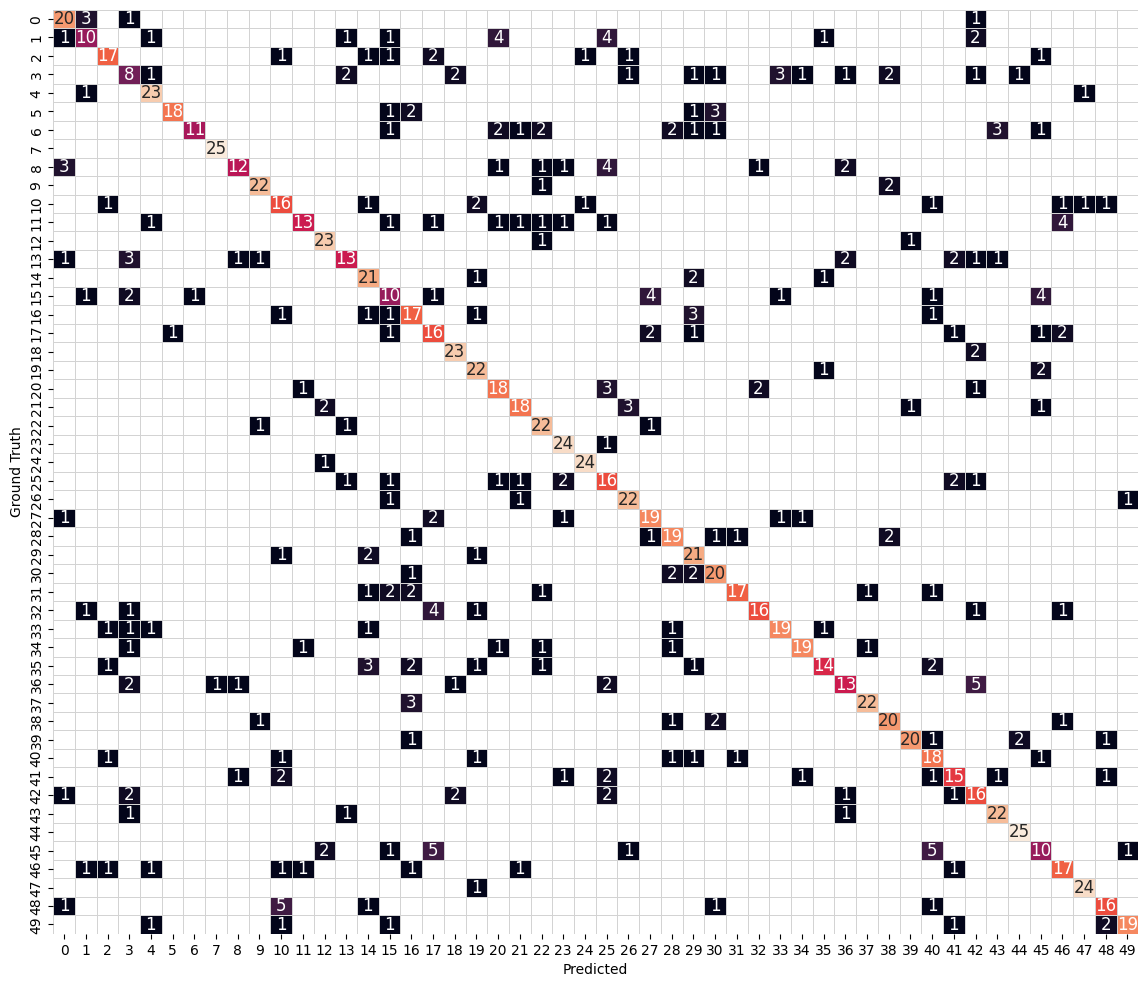

In [12]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)